In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

cur_dir = os.getcwd()
train_set = pd.read_csv(cur_dir + '/../data/train_set_artificial.csv', low_memory=False)
test_set = pd.read_csv(cur_dir + '/../data/test_set.csv', low_memory=False)
val_set = pd.read_csv(cur_dir + '/../data/test_set.csv', low_memory=False)

df = pd.concat([train_set, test_set, val_set], axis=0)

X_train = train_set.drop(['delay_class'],axis=1)
y_train = train_set['delay_class']

X_val = val_set.drop(['delay_class'],axis=1)
y_val = val_set['delay_class']

X_test = test_set.drop(['delay_class'],axis=1)
y_test = test_set['delay_class']

In [2]:
df

,carrier,origin,dest,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,sched_time_in_min,Precipitation Binary,New Snow Binary,Snow Depth Binary,delay_class
0,DL,JFK,MCO,0.170370,0.176219,0.358025,0.346667,0.350649,0.418301,0.000000,0.0,0.0,0.917582,0.316067,yes,no,no,no
1,EV,EWR,MCI,0.229630,0.206404,0.407407,0.333333,0.370130,0.254902,0.000000,0.0,0.0,0.840659,0.374012,yes,no,no,no
2,B6,JFK,MSY,0.232593,0.224760,0.308642,0.293333,0.298701,0.241830,0.000000,0.0,0.0,0.250000,0.087796,no,no,no,no
3,B6,EWR,FLL,0.195556,0.200897,0.506173,0.493333,0.500000,0.459695,0.000000,0.0,0.0,0.274725,0.579456,yes,no,no,yes
4,WN,LGA,BNA,0.130370,0.139506,0.691358,0.773333,0.733766,0.250545,0.004988,0.0,0.0,0.530220,0.267779,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65465,EV,EWR,MEM,0.182222,0.176627,0.135802,0.160000,0.142857,0.023965,0.000000,0.0,0.0,0.898352,0.636523,no,no,no,no
65466,EV,EWR,MCI,0.201481,0.206404,0.938272,0.893333,0.922078,0.583878,0.022444,0.0,0.0,0.549451,0.352063,yes,no,no,no
65467,EV,EWR,CHS,0.102222,0.111768,0.740741,0.613333,0.681818,0.422658,0.134663,0.0,0.0,0.722527,0.140474,yes,no,no,no
65468,EV,LGA,PIT,0.048889,0.052009,0.654321,0.573333,0.616883,0.230937,0.000000,0.0,0.0,0.706044,0.340650,no,no,no,no


In [3]:
from sklearn.preprocessing import OneHotEncoder

# Transform categorical features into binary features
categorical_columns = list(X_train.select_dtypes(include=['object']).columns)
encoder = OneHotEncoder()

# Use df to fit the encoder to prevent scenarios that the binary features in train and test sets are different, 
# For example, test set has dest_LAX, but train set does not have dest_LAX
encoder.fit(df[categorical_columns])

X_train_category = encoder.transform(X_train[categorical_columns])
X_test_category = encoder.transform(X_test[categorical_columns])
X_val_category = encoder.transform(X_val[categorical_columns])

# Get numerical features
numerical_columns = list(X_train.select_dtypes(include=['float64']).columns)

# Combine the numerical and categorical features
X_train_df_category = pd.DataFrame(X_train_category.toarray())
X_train_df_category.columns = encoder.get_feature_names_out()
X_train_df_numerical = pd.DataFrame(X_train[numerical_columns]).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_df_numerical, X_train_df_category], axis=1)


X_test_df_category = pd.DataFrame(X_test_category.toarray())
X_test_df_category.columns = encoder.get_feature_names_out()
X_test_df_numerical = pd.DataFrame(X_test[numerical_columns]).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_df_numerical, X_test_df_category], axis=1)

X_val_df_category = pd.DataFrame(X_val_category.toarray())
X_val_df_category.columns = encoder.get_feature_names_out()
X_val_df_numerical = pd.DataFrame(X_val[numerical_columns]).reset_index(drop=True)
X_val_encoded = pd.concat([X_val_df_numerical, X_val_df_category], axis=1)

In [4]:
X_train_encoded

,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,...,dest_TUL,dest_TVC,dest_TYS,dest_XNA,Precipitation Binary_no,Precipitation Binary_yes,New Snow Binary_no,New Snow Binary_yes,Snow Depth Binary_no,Snow Depth Binary_yes
0,0.170370,0.176219,0.358025,0.346667,0.350649,0.418301,0.000000,0.0,0.0,0.917582,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.229630,0.206404,0.407407,0.333333,0.370130,0.254902,0.000000,0.0,0.0,0.840659,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.232593,0.224760,0.308642,0.293333,0.298701,0.241830,0.000000,0.0,0.0,0.250000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.195556,0.200897,0.506173,0.493333,0.500000,0.459695,0.000000,0.0,0.0,0.274725,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.130370,0.139506,0.691358,0.773333,0.733766,0.250545,0.004988,0.0,0.0,0.530220,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293895,0.059259,0.069141,0.545426,0.573333,0.559607,0.334357,0.000000,0.0,0.0,0.773058,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
293896,0.057778,0.037927,0.259259,0.213333,0.233766,0.385621,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
293897,0.278015,0.309606,0.672717,0.641133,0.659579,0.574152,0.000000,0.0,0.0,0.779986,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
293898,0.238519,0.265588,0.619803,0.696054,0.658494,0.295969,0.285698,0.0,0.0,0.439560,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [5]:
X_test_encoded

,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,...,dest_TUL,dest_TVC,dest_TYS,dest_XNA,Precipitation Binary_no,Precipitation Binary_yes,New Snow Binary_no,New Snow Binary_yes,Snow Depth Binary_no,Snow Depth Binary_yes
0,0.305185,0.267387,0.444444,0.253333,0.350649,0.627451,0.112219,0.0,0.0,0.082418,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.407407,0.488476,0.827160,0.840000,0.837662,0.501089,0.000000,0.0,0.0,0.516484,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.405926,0.437895,0.296296,0.253333,0.272727,0.294118,0.000000,0.0,0.0,0.197802,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.183704,0.139099,0.790123,0.813333,0.805195,0.385621,0.000000,0.0,0.0,0.607143,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.171852,0.133184,0.345679,0.266667,0.305195,0.405229,0.000000,0.0,0.1,0.967033,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65465,0.182222,0.176627,0.135802,0.160000,0.142857,0.023965,0.000000,0.0,0.0,0.898352,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
65466,0.201481,0.206404,0.938272,0.893333,0.922078,0.583878,0.022444,0.0,0.0,0.549451,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
65467,0.102222,0.111768,0.740741,0.613333,0.681818,0.422658,0.134663,0.0,0.0,0.722527,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
65468,0.048889,0.052009,0.654321,0.573333,0.616883,0.230937,0.000000,0.0,0.0,0.706044,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf': [20, 30, 40, 50],
    'ccp_alpha': [0, 0.05, 0.1]
}
print("Performing grid search...")
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=4, verbose=2)
grid_search.fit(X_val_encoded, y_val)
print("Grid Search complete!")
print("Best Hyperparameters:", grid_search.best_params_)

tuned_tree = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
tuned_tree.fit(X_train_encoded, y_train)
accuracy = tuned_tree.score(X_test_encoded, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Performing grid search...
Fitting 4 folds for each of 144 candidates, totalling 576 fits
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.4s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.5s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.5s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=30; total time=   0.4s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=30; total time=   0.4s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=30; total time=   0.4s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=40; total time=   0.4s
[CV] END ccp_alpha=0, criterion=gini, max_depth=10, min_samples_leaf=40; total time

[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=40; total time=   0.6s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=20, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=entropy, max_depth=20, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=entropy, max_depth

[CV] END ccp_alpha=0, criterion=log_loss, max_depth=20, min_samples_leaf=50; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=20, min_samples_leaf=50; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0, criterion=log_loss

[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=40; total time=   0.4s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=entropy, max_depth=10, min_samples_leaf=50; total time=   0.4s
[CV] END ccp_alpha=0

[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=40; total time=   0.6s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=15, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=20, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0.05, criterion=log_loss, max_depth=20, min_samples_leaf=20; total time=   0.6s
[CV] END c

[CV] END ccp_alpha=0.1, criterion=gini, max_depth=20, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=20, min_samples_leaf=50; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=20; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_samples_leaf=30; total time=   0.6s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=25, min_sa

[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=20; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=30; total time=   0.4s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=30; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=40; total time=   0.4s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=40; total time=   0.5s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, min_samples_leaf=50; total time=   0.5s
[CV] END ccp_alpha=0

In [7]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# decision_tree = DecisionTreeClassifier()
# param_grid = {
#     'criterion': ["gini", "entropy", "log_loss"],
#     'max_depth': [15, 20, 25],
#     'min_samples_leaf': [70, 85, 100],
#     'ccp_alpha': [0, 0.05, 0.1]
# }
# print("Performing grid search...")
# grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=4, verbose=2)
# grid_search.fit(X_train_encoded, y_train)
# print("Grid Search complete!")
# print("Best Hyperparameters:", grid_search.best_params_)

# tuned_tree = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
#                                     max_depth=grid_search.best_params_['max_depth'],
#                                     min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
# tuned_tree.fit(X_train_encoded, y_train)
# accuracy = tuned_tree.score(X_test_encoded, y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = tuned_tree.predict(X_test_encoded)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

print(classification_report(y_test, y_pred))

[[37328 11774]
 [ 6983  9385]]
              precision    recall  f1-score   support

          no       0.84      0.76      0.80     49102
         yes       0.44      0.57      0.50     16368

    accuracy                           0.71     65470
   macro avg       0.64      0.67      0.65     65470
weighted avg       0.74      0.71      0.72     65470



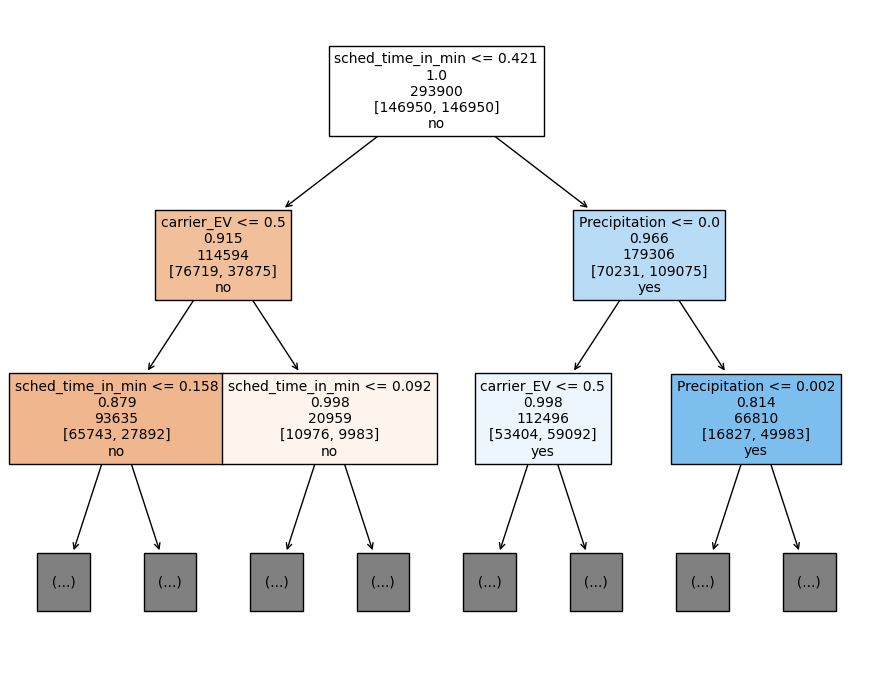

In [9]:
from sklearn import tree

fig = plt.figure(figsize = (11, 8.5))
_ = tree.plot_tree(tuned_tree, 
                   feature_names=X_train_encoded.columns.values,  
                   class_names=y_train.unique(),
                   filled=True, max_depth=2, fontsize=10, label='none')
fig.savefig("decistion_tree.pdf")

In [10]:
# Post Pruning
# I just moved ccp_alpha into the initial grid search. I'm not really sure why it had it's own section?
"""from sklearn.metrics import accuracy_score

path = tuned_tree.cost_complexity_pruning_path(X_train_encoded, y_train)
ccp_alphas = path.ccp_alphas

best_accuracy = 0
best_tree = None
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train_encoded, y_train)
    y_pred = pruned_tree.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_tree = pruned_tree"""

"from sklearn.metrics import accuracy_score\n\npath = tuned_tree.cost_complexity_pruning_path(X_train_encoded, y_train)\nccp_alphas = path.ccp_alphas\n\nbest_accuracy = 0\nbest_tree = None\nfor ccp_alpha in ccp_alphas:\n    pruned_tree = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],\n                                    max_depth=grid_search.best_params_['max_depth'],\n                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],\n                                    ccp_alpha=ccp_alpha)\n    pruned_tree.fit(X_train_encoded, y_train)\n    y_pred = pruned_tree.predict(X_test_encoded)\n    accuracy = accuracy_score(y_test, y_pred)\n    if accuracy > best_accuracy:\n        best_accuracy = accuracy\n        best_tree = pruned_tree"

In [11]:
#print("Accuracy: {:.2f}%".format(best_accuracy * 100))

In [12]:
"""fig = plt.figure()
_ = tree.plot_tree(best_tree, 
                   feature_names=X_train_encoded.columns.values,  
                   class_names=y_train.unique(),
                   filled=True)
fig.savefig("pruned_decistion_tree.pdf")"""

'fig = plt.figure()\n_ = tree.plot_tree(best_tree, \n                   feature_names=X_train_encoded.columns.values,  \n                   class_names=y_train.unique(),\n                   filled=True)\nfig.savefig("pruned_decistion_tree.pdf")'

In [13]:
"""y_pred = best_tree.predict(X_test_encoded)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)"""

'y_pred = best_tree.predict(X_test_encoded)\nmatrix = confusion_matrix(y_test, y_pred)\nprint(matrix)'